In [7]:
pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.6 MB/s 
     |████████████████████████████████| 1.6 MB 57.7 MB/s 
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=97a00466ffe4fbc3318993534a24f184ee45f1f2ebf425ab56fb04b09e131e73
  Stored in directory: /root/.cache/pip/wheels/da/9c/84/0670d7771fe7a5383c1ee4506df03e664d1f9abeb54db10e1d
Successfully built jcopml




     Keterangan                                               Text  \
0           ham  Go until jurong point, crazy.. Available only ...   
1           ham                      Ok lar... Joking wif u oni...   
2          spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3           ham  U dun say so early hor... U c already then say...   
4           ham  Nah I don't think he goes to usf, he lives aro...   
...         ...                                                ...   
5567       spam  This is the 2nd time we have tried 2 contact u...   
5568        ham              Will Ì_ b going to esplanade fr home?   
5569        ham  Pity, * was in mood for that. So...any other s...   
5570        ham  The guy did some bitching but I acted like i'd...   
5571        ham                         Rofl. Its true to its name   

                                              processed  
0     go until jurong point crazi avail onli in bugi...  
1                                 ok lar 

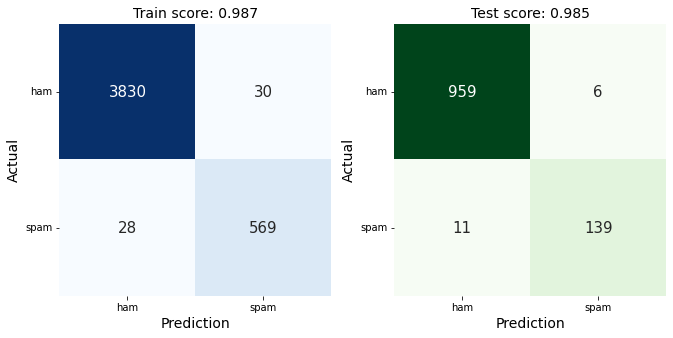

In [22]:
#Import library
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Read dataset
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
#Menghilangkan kolom Unnamed 2 sampai 4 yg tidak ada gunanya
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
#Mengubah nama kolom v1 menjadi Label dan v2 menjadi Text
df = df.rename(columns={'v1': 'Keterangan', 'v2': 'Text'})

# Pre-Processing
# Mengganti email pada dataset dengan kata 'email'
df['processed'] = df.Text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

# Mengganti URL pada dataset dengan kata 'webaddress'
df['processed'] = df['processed'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

# Mengganti simbol mata uang pada dataset dengan kata 'moneysymb' (£ can by typed with ALT key + 156)
df['processed'] = df['processed'].str.replace(r'£|\$', 'moneysymb')
    
# Mengganti 10 digit nomor telepon pada dataset dengan kata 'phonenumber'
df['processed'] = df['processed'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumbr')
    
# Mengganti nomor pada dataset dengan kata 'numbr'
df['processed'] = df['processed'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Menghapus tanda baca
df['processed'] = df['processed'].str.replace(r'[^\w\d\s]', ' ')

# Mengganti spasi antar kata dengan 1 spasi saja
df['processed'] = df['processed'].str.replace(r'\s+', ' ')

# Menghapus spasi di awal dan akhir kalimat
df['processed'] = df['processed'].str.replace(r'^\s+|\s+?$', '')

# Mengubah kata menjadi huruf kecil semua
df['processed'] = df['processed'].str.lower()

# Menghapus akar kata menggunakan Porter stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['processed'] = df['processed'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

#Menampilkan data setelah pre-processing 
print('\n')
print(df)

# Membuat kantong kata menggunakan scikit learn
# Mengekstrak 1500 kata umum teratas sebagai fitur
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(processed).toarray() 
y=df['Keterangan']

#Membagi data menjadi train dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Membuat model dengan naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train.ravel())
pred = mnb.predict(X_test)

#Cek akurasi,confussion matrix,precission,recall,f1-score,support
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve
plot_classification_report(X_train, y_train, X_test, y_test, mnb, report=True)

from jcopml.plot import plot_classification_report, plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, mnb)

In [25]:
from wordcloud import WordCloud, STOPWORDS
spam = df[df['Keterangan'] == 'spam']
ham = df[df['Keterangan'] == 'ham']

stopwords = set(STOPWORDS)
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

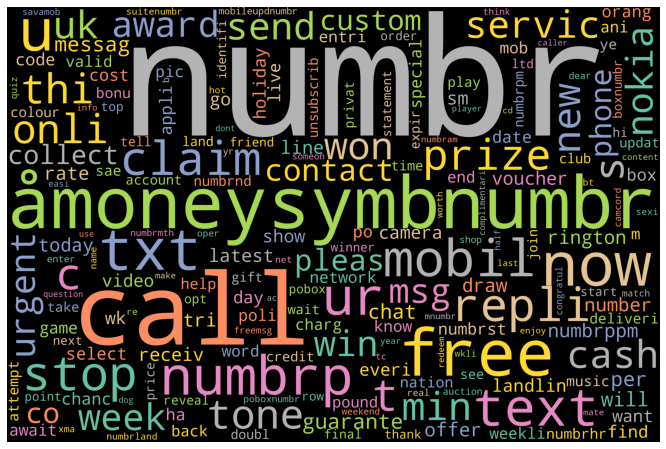

In [26]:
#Wordcloud spam
sp = ' '.join(Text for Text in spam.processed)
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(sp)
plot_cloud(wordcloud1)

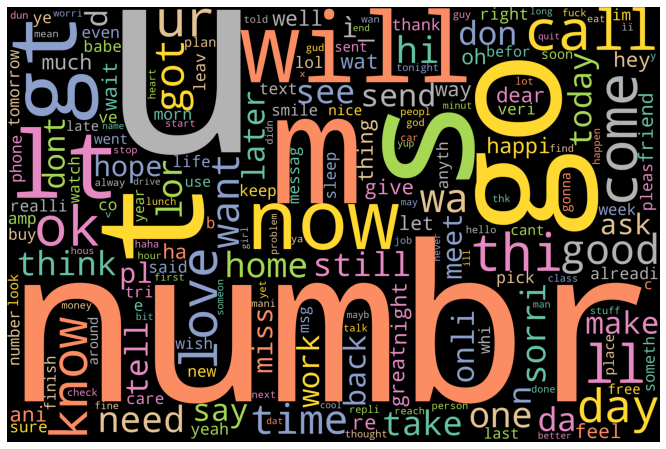

In [24]:
#Wordcloud ham
hm = ' '.join(Text for Text in ham.processed)
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=3, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(hm)
plot_cloud(wordcloud2)